In [1]:
import sys; sys.path.append("../../")
from DataPreprocessing.DataPreprocessing import *
from DataExploration.DataExploration import *
from utils import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Question:
    Can we predict Rating of a game based on features given: publisher, platform, critic score,... ?



## 1- Expectations: 
      The model should determine the game characteristics through critic score, developer,
      publisher and platform that best predict that Rating of a game.

## Read Data 

In [2]:
df = read_data(kind='dataset')
df = df.dropna()

## EDA

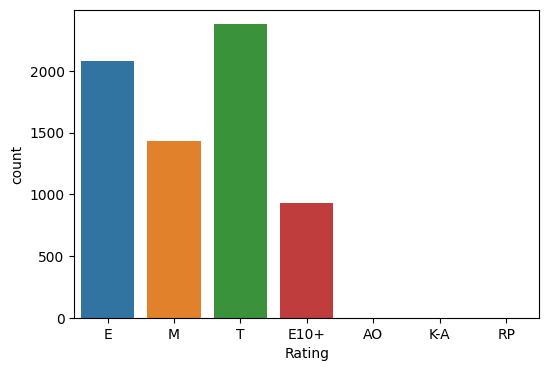

In [3]:
count_plot("Rating", df)

In [ ]:
# plot mean critic score for each rating
plot(df.groupby('Rating')['Critic_Score'].mean(), 'Rating', 'Critic_Score', 'Mean Critic Score for each Rating')

## Split Data

In [4]:
# read the data
df_train=read_data(kind='train')
df_val = read_data(kind='val')
selected_cols=[ 'Platform', 'Genre', 'Publisher', 'Global_Sales', 'Critic_Score', 'Rating', 'Critic_Count']
df_train = df_train[selected_cols]
df_val = df_val[selected_cols]
df_train.head()

,Platform,Genre,Publisher,Global_Sales,Critic_Score,Rating,Critic_Count
0,X360,Shooter,Cave,0.06,NaN,NaN,NaN
1,WiiU,Action,Namco Bandai Games,0.06,66.0,T,11.0
2,DS,Role-Playing,Konami Digital Entertainment,0.23,82.0,E10+,39.0
3,PSP,Adventure,Yeti,0.01,NaN,NaN,NaN
4,X360,Action,Ubisoft,1.59,85.0,M,75.0


## Handle Missing values 
    - as all features used here are categorical, mode imputation is used 
      to handle missing values.


In [5]:
# handle missing values using mode imputation
df_train =handle_missing_values(df_train, handling_method='mode_knn',neighbors=5)
df_val =handle_missing_values(df_val,handling_method='mode_knn',neighbors=5)

df_train.head()

Total Number of rows : 10031
Number of rows with missing values: 5226
Number of rows after handling missing values: 10031 and Number of missing values: 0
Total Number of rows : 3344
Number of rows with missing values: 1732
Number of rows after handling missing values: 3344 and Number of missing values: 0


,Platform,Genre,Publisher,Global_Sales,Critic_Score,Rating,Critic_Count
0,X360,Shooter,Cave,0.06,68.879268,E,26.315508
1,WiiU,Action,Namco Bandai Games,0.06,66.000000,T,11.000000
2,DS,Role-Playing,Konami Digital Entertainment,0.23,82.000000,E10+,39.000000
3,PSP,Adventure,Yeti,0.01,68.879268,E,26.315508
4,X360,Action,Ubisoft,1.59,85.000000,M,75.000000


### Drop rating values with number of rows less than 100

In [6]:
df_train = df_train.groupby('Rating').filter(lambda x: len(x) > 400)
df_val = df_val.groupby('Rating').filter(lambda x: len(x) > 400)

In [7]:
df_train = df_train[df_train['Rating'] != 'E10+']
df_val = df_val[df_val['Rating'] != 'E10+']

## prepare features and labels

In [8]:
y_train = df_train['Rating']
X_train = df_train.drop('Rating', axis=1)
y_val = df_val['Rating']
X_val = df_val.drop('Rating', axis=1)
X_train.head()

,Platform,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count
0,X360,Shooter,Cave,0.06,68.879268,26.315508
1,WiiU,Action,Namco Bandai Games,0.06,66.000000,11.000000
3,PSP,Adventure,Yeti,0.01,68.879268,26.315508
4,X360,Action,Ubisoft,1.59,85.000000,75.000000
5,PS2,Adventure,Ubisoft,0.25,51.000000,32.000000


### Encode Categorical Features

In [9]:
# encoding the categorical columns
X_train = encoding(X_train)
X_val = encoding(X_val)

In [10]:
X_train.isnull().sum()  

Platform        0
Genre           0
Publisher       0
Global_Sales    0
Critic_Score    0
Critic_Count    0
dtype: int64

# Models

In [11]:
# create the model
model = SVC(kernel='rbf', C=7)
# fit the model
model.fit(X_train, y_train)
# predict the model
y_pred = model.predict(X_val)
# get the accuracy score
print(f'Accuracy Score: {accuracy_score(y_val, y_pred)}')

Accuracy Score: 0.8004362050163577


In [12]:
# create the model
model = SVC(kernel='linear')
# fit the model
model.fit(X_train, y_train)
# predict the model
y_pred = model.predict(X_val)
# get the accuracy score
print(f'Accuracy Score: {accuracy_score(y_val, y_pred)}')

Accuracy Score: 0.7724463831334061


In [13]:
recursive_feature_elimination(model, 1, 5, X_train, y_train)

In [ ]:
# create the model
model = RandomForestClassifier()
# fit the model
model.fit(X_train, y_train)
# predict the model
y_pred = model.predict(X_val)
# get the accuracy score
print(f'Accuracy Score: {accuracy_score(y_val, y_pred)}')


Accuracy Score: 0.8033442384587423


In [ ]:
#try ada boost
# create the model
model = AdaBoostClassifier()
# fit the model
model.fit(X_train, y_train)
# predict the model
y_pred = model.predict(X_val)
# get the accuracy score
print(f'Accuracy Score: {accuracy_score(y_val, y_pred)}')


Accuracy Score: 0.7651762995274446


In [ ]:
# create the model
model = LogisticRegression()
# fit the model
model.fit(X_train, y_train)
# predict the model
y_pred = model.predict(X_val)
# get the accuracy score
print(f'Accuracy Score: {accuracy_score(y_val, y_pred)}')


Accuracy Score: 0.7709923664122137


C:\Users\dell\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 3- Comparing Expectations to collecting data and models:
       
    